In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
import numpy as np
from matplotlib import pyplot as plt

Text(0, 0.5, 'signal, arb.units')

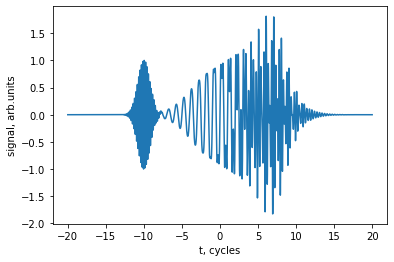

In [30]:
# set timeline
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 3**9 + 6)

# generate the signal
y = np.sin(t) * np.exp(-t**2 / (2 * 20**2)) + \
    np.sin(3*t) * np.exp(-(t - 5*2*np.pi)**2 / (2 * 20**2)) + \
    np.sin(5.5*t) * np.exp(-(t + 10*2*np.pi)**2 / (2 * 5**2)) + \
    np.sin(4*t) * np.exp(-(t - 7*2*np.pi)**2 / (2 * 10**2))

# plot the signal
plt.plot(t / (2*np.pi), y)
plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

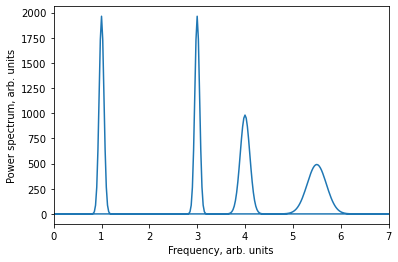

In [31]:
# Fourier spectrum
sp = np.fft.fft(y)
w = np.fft.fftfreq(len(y), d=(t[1]-t[0]) / (2*np.pi))

plt.plot(w, abs(sp))
plt.xlim(0, 7)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')

Text(0, 0.5, 'Power spectrum, arb. units')

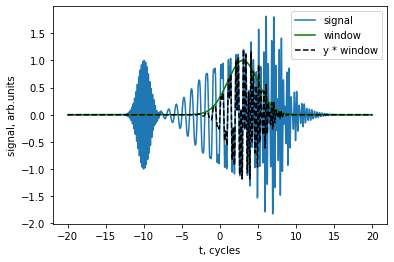

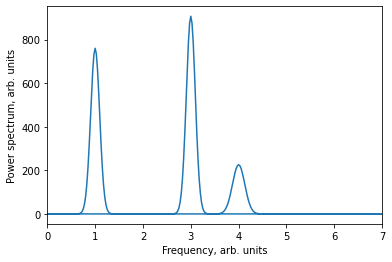

In [32]:
# windowed Fourier transform (Gabor transform, spectrogram)
window_width = 2.0*2*np.pi
window_position = 3.0*2*np.pi
window_function = np.exp(-(t - window_position)**2 / (2 * window_width**2))

y_window = y*window_function

plt.plot(t / (2*np.pi), y, label='signal')
plt.plot(t / (2*np.pi), window_function, color='g', label='window')
plt.plot(t / (2*np.pi), y_window, 'k--', label='y * window')

plt.legend()
plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')

plt.figure()
sp = np.fft.fft(y_window)
w = np.fft.fftfreq(len(y_window), d=(t[1]-t[0]) / (2*np.pi))
plt.plot(w, abs(sp))
plt.xlim(0, 7)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')

Text(0, 0.5, 'signal*window, arb.units')

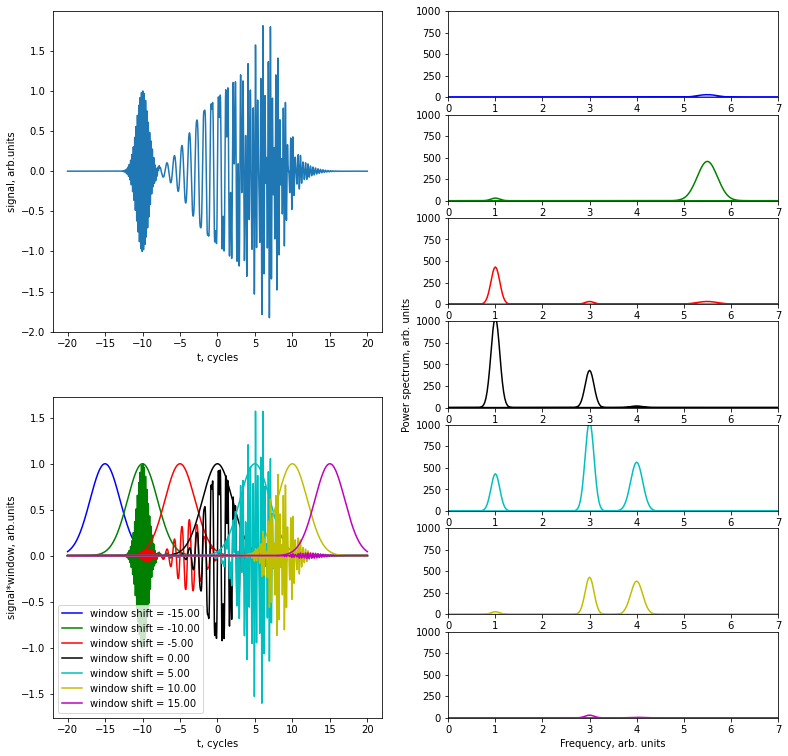

In [33]:
# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum
import warnings
warnings.simplefilter("ignore")

plt.figure(figsize=(13, 13))
plt.subplot(2, 2, 1)
plt.plot(t/2/np.pi, y)
plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')

colors = ['b', 'g', 'r', 'k', 'c', 'y', 'm']

for i, shift in enumerate(range(-15, 20, 5)):
    window_width = 2.0*2*np.pi
    window_position = shift*2*np.pi
    window_function = np.exp(-(t - window_position)**2 / (2 * window_width**2))

    y_window = y*window_function

    plt.subplot(2, 2, 3)
    plt.plot(t / (2*np.pi), window_function, color=colors[i], label='window shift = {:.2f}'.format(shift))
    plt.plot(t / (2*np.pi), y_window, color=colors[i])
  
    plt.subplot(7, 2, i*2+2)
    sp = np.fft.fft(y_window)
    w = np.fft.fftfreq(len(y_window), d=(t[1]-t[0]) / (2*np.pi)) 
    plt.plot(w, abs(sp), colors[i])
    plt.xlim(0, 7)
    plt.ylim(0, 1e3)

    if i == 3:
        plt.ylabel('Power spectrum, arb. units')
    
plt.xlabel('Frequency, arb. units')

plt.subplot(2, 2, 3)
plt.legend()
plt.xlabel('t, cycles')
plt.ylabel('signal*window, arb.units')

In [34]:
def get_specgram(y, t, nwindowsteps=1000):
    window_positions = np.linspace(-20*2*np.pi, 20*2*np.pi, nwindowsteps)
    specgram = np.zeros((len(t), len(window_positions)))
    window_width = 2.0*2*np.pi

    for n, window_position in enumerate(window_positions):
        window_function = np.exp(-(t - window_position)**2 / (2 * window_width**2))
        specgram[:, n] = abs(np.fft.fft(y * window_function))

    return specgram


def plot_specgram(s, t, w, title=''):
    plt.figure()
    plt.imshow(s, aspect='auto', extent=[min(t) / (2*np.pi), max(t) / (2*np.pi), \
                                     w[0], 2 * w[int(len(w)/2)-1]])
    plt.ylim(0, 7)

    cbar = plt.colorbar()
    cbar.set_label('Power spectrum')
    plt.xlabel('Time, cycles')
    plt.ylabel('Frequency, arb. units')
    plt.title(title)

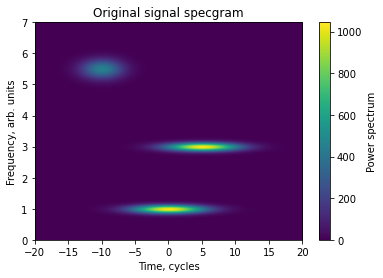

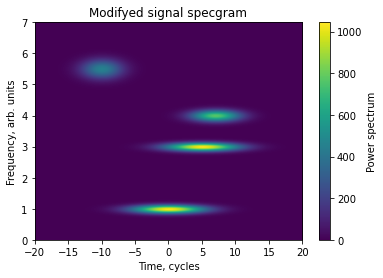

In [35]:
# plot spectrogram
original_y = np.sin(t) * np.exp(-t**2 / (2 * 20**2)) + \
             np.sin(3*t) * np.exp(-(t - 5*2*np.pi)**2 / (2 * 20**2)) + \
             np.sin(5.5*t) * np.exp(-(t + 10*2*np.pi)**2 / (2 * 5**2))

w = np.fft.fftfreq(len(y), d=(t[1]-t[0]) / (2*np.pi))

s = get_specgram(original_y, t, 1000)
plot_specgram(s, t, w, 'Original signal specgram')

s = get_specgram(y, t, 1000)
plot_specgram(s, t, w, 'Modifyed signal specgram')

# explain what you see
# Here is 3D plots (x, y, color), where lighter areas mean higher power spectrum.
# The distribution (shift) of the areas by x axis means that particular frequency components appear 
# in different parts of signal timeline (and we "catch" them with windows on different time positions);
# the positions by y axis show frequencies of sin addendums in signal.

# On the first figure there are three spots, which means there are three sin functions in the signal,
# on the second there are four, which means there are four sin functions in the signal (and, indeed, the fourth was added 
# to the given original signal).

In [39]:
from datetime import datetime


for additional_steps in np.linspace(-5, 5, 7):
    t = np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14 + int(additional_steps)) 
    y = np.sin(t) * np.exp(-t**2 / (2 * 20**2)) + \
        np.sin(3*t) * np.exp(-(t - 5*2*np.pi)**2 / (2 * 20**2)) + \
        np.sin(5.5*t) * np.exp(-(t + 10*2*np.pi)**2 / (2 * 5**2)) + \
        np.sin(4*t) * np.exp(-(t - 7*2*np.pi)**2 / (2 * 10**2))

    start_time = datetime.now()
    s = get_specgram(y, t)
    end_time = datetime.now()

    print("Num of steps: 2^14 + ({}), then performing time is {:.2f} s".format(int(additional_steps), 
                                                                              (end_time - start_time).total_seconds()))

# The possible explanation of different performing time:
# Fast Fourier transform performs faster, when number of samples is 2**k (especially, when k is even). 
# That is why, when num of samples in linspace = 2**14, getting spectogram takes less time than in all other cases,
# and the more num of samples is different from 2**k the more is the performing time.

Num of steps: 2^14 + (-5), then performing time is 1.86 s
Num of steps: 2^14 + (-3), then performing time is 1.82 s
Num of steps: 2^14 + (-1), then performing time is 1.08 s
Num of steps: 2^14 + (0), then performing time is 0.54 s
Num of steps: 2^14 + (1), then performing time is 0.99 s
Num of steps: 2^14 + (3), then performing time is 1.93 s
Num of steps: 2^14 + (5), then performing time is 1.93 s
